In [1]:
import requests
from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import os

In [2]:
GET_DATA = False

In [3]:
df_train = pd.read_csv('DATA/train.csv')
df_nominated = pd.read_csv('DATA/nominated_p_ids.csv',index_col=0)
df_test = pd.read_csv('DATA/test_ids.csv')
df_test

,source_product_id
0,2747
1,5289
2,5289
3,26237
4,26701
...,...
24697,12143680
24698,12180235
24699,12305148
24700,12456191


In [4]:
id_train_sou = df_train.source_product_id.drop_duplicates().sort_values()
id_train_rel = df_train.rel_product_id.drop_duplicates().sort_values()
id_test_sou = df_test.source_product_id.drop_duplicates().sort_values()
id_test_rel = df_nominated.rel_product_id.drop_duplicates().sort_values()

count = 0
for i, d in enumerate([id_train_sou,id_train_rel,id_test_sou,id_test_rel]):
    count += d.shape[0]
    print(f'#Unique_{i} = {d.shape[0]}')
print(f'#Unique_all = {count}')

#Unique_0 = 12345
#Unique_1 = 61200
#Unique_2 = 1945
#Unique_3 = 17647
#Unique_all = 93137


In [5]:
ids = pd.concat([id_train_sou,id_train_rel,id_test_sou,id_test_rel]).drop_duplicates().sort_values().reset_index(drop=True)
ids

0             350
1            1895
2            2739
3            2746
4            2747
           ...   
70513    13281155
70514    13287638
70515    13288016
70516    13288597
70517    13299299
Length: 70518, dtype: int64

In [6]:
def get_request(i):
    #time.sleep(1)
    ok = False
    while ok == False:
        try: 
            ok = True
            r = requests.get(f'https://api.digikala.com/v2/product/{str(i)}/')
            c = r.json()
            if 'is_inactive' in c['data']['product'].keys():
                if c['data']['recommendations'] != []:
                    if 'related_products' in c['data']['recommendations'].keys():
                        idx = c['data']['recommendations']['related_products']['products'][0]['id']
                        c = get_request(idx)
                    elif 'also_bought_products' in c['data']['recommendations'].keys():
                        idx = c['data']['recommendations']['also_bought_products']['products'][0]['id']
                        c = get_request(idx)
        except:
            print('interupt: 60s')
            ok = False
            time.sleep(60)
    return c

In [7]:
get_request(2079555)

{'status': 200,
 'data': {'product': {'id': 2079555,
   'title_fa': 'پیلینگ صورت پروفشنال مدل BHR01',
   'title_en': '',
   'url': {'base': None,
    'uri': '/product/dkp-2079555/پیلینگ-صورت-پروفشنال-مدل-bhr01'},
   'status': 'out_of_stock',
   'has_quick_view': False,
   'data_layer': {'brand': 'متفرقه',
    'category': '[PC,آرایش صورت]',
    'metric6': 235,
    'dimension2': 0,
    'dimension6': 0,
    'dimension7': 'none',
    'dimension9': 4.1,
    'dimension11': 0,
    'dimension20': 'out_of_stock',
    'item_category2': 'زیبایی و سلامت',
    'item_category3': 'لوازم آرایشی',
    'item_category4': 'برس\u200cها و تجهیزات آرایشی',
    'item_category5': 'برس ها و تجهیزات آرایشی صورت'},
   'product_type': 'product',
   'digiplus': {'services': ['ارسال رایگان'],
    'is_jet_eligible': False,
    'cash_back': 0,
    'is_general_location_jet_eligible': False,
    'fast_shipping_text': None},
   'images': {'main': {'storage_ids': [],
     'url': ['https://dkstatics-public.digikala.com/dig

In [8]:
def get_data():
    to_iterate = ids

    data = {}
    for j, i in tqdm(zip(to_iterate.index, to_iterate), total=(len(to_iterate))):
        c = get_request(i)
        while c == {'status': 404}:
            time.sleep(60)
            c = get_request(i)

        data[i] = c
        if j%10 == 9:
            np.save(f'DATA/ID2DATA/{j-j%10}_{j}.npy', data)
            data = {}
    np.save(f'DATA/ID2DATA/{j-j%10}_{j}.npy', data)

In [9]:
if GET_DATA:
    get_data()

In [10]:
data = {}
K = []
for file in tqdm(os.listdir('DATA/ID2DATA/')):
    d = np.load(f'DATA/ID2DATA/{file}', allow_pickle=True).item()
    for k, v in d.items():
        if k not in K:
            data[k] = v
            K.append(k)
        else:
            # Sanity Check
            raise Exception('duplicate!')

100%|██████████████████████████████████████████████████████████████████████████████| 7052/7052 [03:10<00:00, 37.00it/s]


In [11]:
data[2079555]

{'status': 200,
 'data': {'product': {'is_inactive': True},
  'recommendations': {'related_products': {'title': 'کالاهای مشابه',
    'discount_percent': None,
    'see_more_url': None,
    'products': [{'id': 9287283,
      'title_fa': 'استند لوازم آرایشی مدل 175',
      'title_en': '',
      'url': {'base': None,
       'uri': '/product/dkp-9287283/استند-لوازم-آرایشی-مدل-175'},
      'status': 'marketable',
      'has_quick_view': True,
      'data_layer': {'brand': 'متفرقه',
       'category': '[PC,آرایش صورت]',
       'metric6': 3,
       'dimension2': 15,
       'dimension6': 0,
       'dimension7': 'special-offer',
       'dimension9': 3.3,
       'dimension11': 0,
       'dimension20': 'marketable',
       'item_category2': 'زیبایی و سلامت',
       'item_category3': 'لوازم آرایشی',
       'item_category4': 'برس\u200cها و تجهیزات آرایشی',
       'item_category5': 'برس ها و تجهیزات آرایشی صورت',
       'dimension19': 'similar-goods'},
      'product_type': 'product',
      'digiplu

In [12]:
# Sanity Check
(pd.Series(list(data.keys())).sort_values().reset_index(drop=True) == ids).all()

True

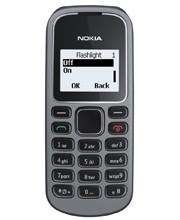

In [13]:
url = data[350]['data']['seo']['twitter_card']['image']
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [14]:
def get_image(url):
    ok = False
    while ok == False:
        try:
            response = requests.get(url)
            while response == {'status': 404}:
                print('err404: 60s')
                time.sleep(60)
                response = requests.get(url)
            ok = True
        except:
            print('err: 60s')
            time.sleep(60)
    
    return response.content

In [15]:
def clean_data(data):
    cleaned = {}
    for k in tqdm(data.keys()):
        cleaned[k] = {}
        # fill inactive products===============
        if 'is_inactive' in data[k]['data']['product'].keys():
            data[k] = get_request(k)
        # image================================
        if np.asarray(Image.open(f'DATA/Images/{k}.png')).sum() == 0:
            print(f'getting_image: {k}')
            try:
                url = data[k]['data']['seo']['twitter_card']['image']
                img = get_image(url)
#                 img.save(f'DATA/Images/missed/{k}.png')
                with open(f'DATA/Images/missed/{k}.png', 'wb') as handler:
                        handler.write(img)
            except:
                img = Image.new('RGB', (800, 800))
                img.save(f'DATA/Images/missed/{k}.png')
        # title================================
        try:cleaned[k]['title'] = data[k]['data']['product']['title_fa']
        except:cleaned[k]['title'] = None
        # id===================================
        try:cleaned[k]['id'] = data[k]['data']['product']['id']
        except:cleaned[k]['id'] = None
        # category=============================
        try:cleaned[k]['category'] = data[k]['data']['product']['category']['id']
        except:cleaned[k]['category'] = None
        # brand================================
        try:cleaned[k]['brand'] = data[k]['data']['product']['brand']['id']
        except:cleaned[k]['brand'] = None
        
        try:cleaned[k]['is_premium'] = data[k]['data']['product']['brand']['is_premium']
        except:cleaned[k]['is_premium'] = None
            
        try:cleaned[k]['is_miscellaneous'] = data[k]['data']['product']['brand']['is_miscellaneous']
        except:cleaned[k]['is_miscellaneous'] = None
        # rating================================
        try:cleaned[k]['r_rate'] = data[k]['data']['product']['rating']['rate']
        except:cleaned[k]['r_rate'] = None
            
        try:cleaned[k]['r_count'] = data[k]['data']['product']['rating']['count']
        except:cleaned[k]['r_count'] = None
        # properties============================
        try:cleaned[k]['is_fake'] = data[k]['data']['product']['properties']['is_fake']
        except:cleaned[k]['is_fake'] = None
        
        try:cleaned[k]['is_jet'] = data[k]['data']['product']['properties']['is_jet_eligible']
        except:cleaned[k]['is_jet'] = None
        
        try:cleaned[k]['is_med'] = data[k]['data']['product']['properties']['is_medical_supplement']
        except:cleaned[k]['is_med'] = None
        # product_badges========================
        try:
            badges = data[k]['data']['product']['product_badges']
            cleaned[k]['badges'] = ''
            for b in badges:
                cleaned[k]['badges'] += str(b['id'])
                cleaned[k]['badges'] += ','
        except: cleaned[k]['badges'] = None
        # colors================================
        try:
            badges = data[k]['data']['product']['colors']
            cleaned[k]['colors'] = ''
            for b in badges:
                cleaned[k]['colors'] += str(b['id'])
                cleaned[k]['colors'] += ','
        except: cleaned[k]['colors'] = None
        # size_guide============================
        try:cleaned[k]['has_size_guide'] = data[k]['data']['product']['size_guide'] != []
        except: cleaned[k]['has_size_guide'] = None
        # price=================================
        try:cleaned[k]['price'] = data[k]['data']['intrack']['eventData']['unitPrice']
        except:cleaned[k]['price'] = None
    return cleaned

In [16]:
cleaned_data = clean_data(data)

  2%|█▌                                                                           | 1456/70518 [00:54<42:53, 26.83it/s]

getting_image: 2352497


FileNotFoundError: [Errno 2] No such file or directory: 'DATA/Images/missed/2352497.png'

In [24]:
cleaned_data[2072701]

{'title': 'پیلینگ صورت مدل M10',
 'id': 2072701,
 'category': 6484,
 'brand': 719,
 'is_premium': False,
 'is_miscellaneous': False,
 'r_rate': 84,
 'r_count': 6559,
 'is_fake': False,
 'is_jet': False,
 'is_med': False,
 'badges': '25,80,52,42,',
 'colors': '61,',
 'has_size_guide': False,
 'price': 250000}

In [25]:
temp_l = []
for k in cleaned_data.keys():
    temp_l.append(cleaned_data[k].values())
    
df_id2feat = pd.DataFrame(temp_l,index=cleaned_data.keys(), columns=cleaned_data[350].keys())

In [26]:
df_id2feat.to_csv('DATA/id2feat2.csv')
df_id2feat.to_excel('DATA/id2feat2.xlsx')

In [17]:
df_id2feat

In [18]:
ids

In [19]:
df_id2feat.loc[2072238]

In [20]:
df_id2feat.loc[df_id2feat.iloc[:, 1:].isna().all(axis=1)]

In [21]:
nan_index = df_id2feat.loc[df_id2feat.iloc[:, 1:].isna().all(axis=1)].index
prob = []
for i in df_nominated.rel_product_id:
    if i in nan_index:
        prob.append(i)

In [22]:
prob

In [23]:
df_id2feat.category.min()